# Clasificación, Clasterización y Series Temporales


## 1. Preparación de datos

In [37]:
import pandas as pd

df_estadisticas = pd.read_csv('datos_limpios/estadisticas_champions.csv')

df_estadisticas.head()


FileNotFoundError: [Errno 2] No such file or directory: 'datos_limpios/estadisticas_champions.csv'

## 2. Aplicación Técnicas de Clustering

Voy a empezar utilizando K-Means que me dará una primera visión de cómo se agrupan los equipos basándome en las estadísticas. Utilizaré el mñetodo del codo para determinar número óptimo de clusters.



In [ ]:
from sklearn.preprocessing import StandardScaler

#Selecciono las columnas númericas(todas)
columnas_numericas = ['Goles a favor', 'Goles en contra', 'Partidos jugados', 
                      'Victorias', 'Empates', 'Derrotas', 
                      'Porcentaje Victoria', 'Porcentaje Empate', 'Porcentaje Derrota']

#Instancio el escalador
scaler = StandardScaler()

#Normalizo columnas numéricas
df_estadisticas_normalizadas = df_estadisticas.copy()
df_estadisticas_normalizadas[columnas_numericas] = scaler.fit_transform(df_estadisticas[columnas_numericas])

df_estadisticas_normalizadas.head()

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

,HOME_TEAM,Goles a favor,Goles en contra,Partidos jugados,Victorias,Empates,Derrotas,Porcentaje Victoria,Porcentaje Empate,Porcentaje Derrota
0,Bayern München,3.628676,1.398950,2.458466,3.442071,1.039859,0.322696,2.441608,-0.774507,-1.602912
1,Manchester City,3.238281,1.850038,2.660319,3.123588,2.261379,0.951953,1.963092,-0.297731,-1.427353
2,Real Madrid,3.215316,2.842431,2.862172,3.203208,1.772771,1.895840,1.860822,-0.574439,-1.169288
3,Liverpool FC,2.526383,1.714712,2.155687,2.486621,1.039859,1.895840,1.835608,-0.681382,-0.931692
4,Juventus,1.561876,1.398950,2.054760,2.247758,1.039859,1.266582,1.690164,-0.646399,-1.140635


C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

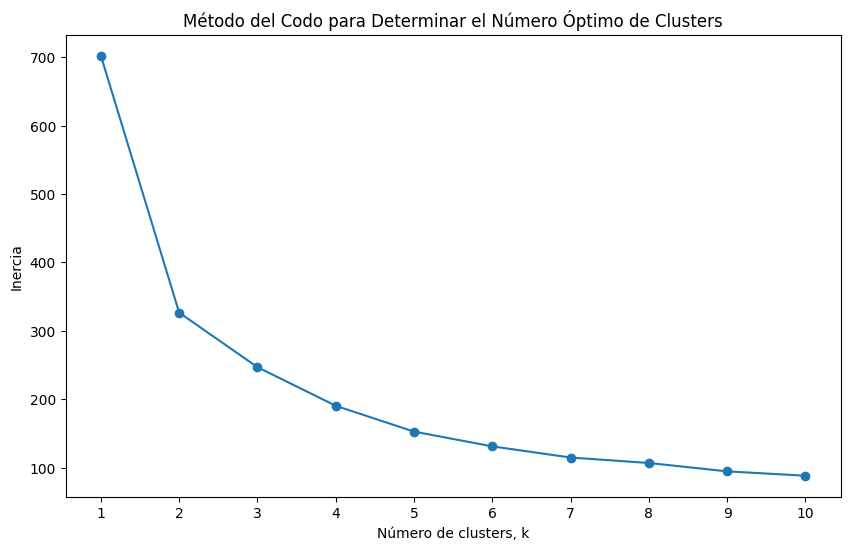

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Determino el rango de valores de k a probar
k_valores = range(1, 11)

#Calculo la inercia para cada valor de k
inercias = []
for k in k_valores:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_estadisticas_normalizadas[columnas_numericas])
    inercias.append(kmeans.inertia_)

#Grafico la inercia para cada valor de k para identificar el codo
plt.figure(figsize=(10, 6))
plt.plot(k_valores, inercias, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(k_valores)
plt.show()


Este método nos dice que hay que buscar el punto donde la reducción de la inercia comienza a ser mas lenta (3 o 4 en este caso), lo que indica que añadir más clusters no mejora significativamente la compactación de los clusters.

Decido elegir k=4

### Aplicación K-Means con k = 4

Voy a distribuir los equipos en 4 clusteres

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

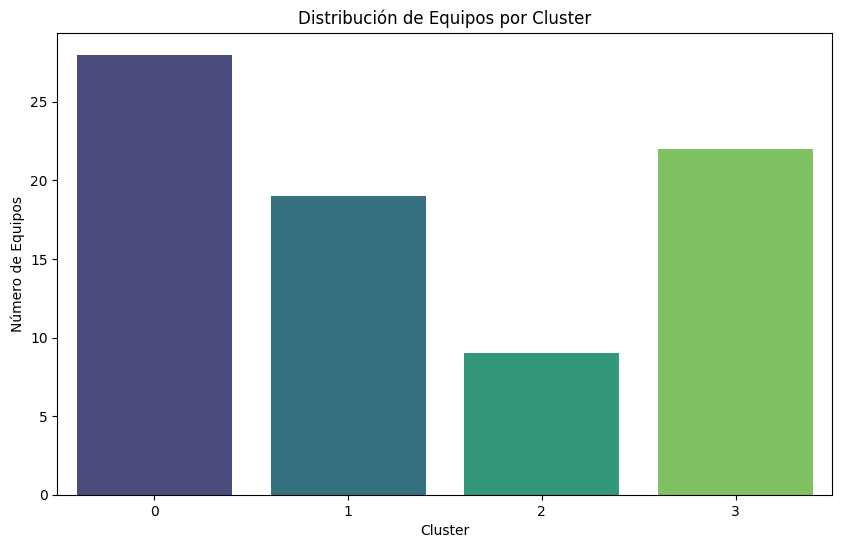

In [ ]:
import seaborn as sns

#Aplicación
kmeans = KMeans(n_clusters=4, random_state=42)
df_estadisticas_normalizadas['cluster'] = kmeans.fit_predict(df_estadisticas_normalizadas[columnas_numericas])

#Visualización
plt.figure(figsize=(10, 6))
sns.countplot(data=df_estadisticas_normalizadas, x='cluster', palette='viridis')
plt.title('Distribución de Equipos por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Equipos')
plt.show()

In [ ]:
#Listo los equipos por cluster
for cluster in range(4):
    print(f"\nEquipos en el cluster {cluster}:")
    equipos = df_estadisticas_normalizadas[df_estadisticas_normalizadas['cluster'] == cluster]['HOME_TEAM'].tolist()
    print(", ".join(equipos))


Equipos en el cluster 0:
Leicester City, Arsenal FC, Villarreal CF, FC Schalke 04, Eintracht Frankfurt, Valencia CF, FC Basel, Viktoria Plze?, AC Milan, FC Sheriff, CSKA Moskva, Lazio Roma, Bayer Leverkusen, Bor. Mönchengladbach, Spartak Moskva, FC København, VfL Wolfsburg, FK Krasnodar, FK Rostov, Celtic FC, Slavia Praha, 1899 Hoffenheim, Qaraba? FK, PSV Eindhoven, PFC Ludogorets Razgrad, NK Maribor, FC Midtjylland, APOEL Nikosia

Equipos en el cluster 1:
Chelsea FC, AFC Ajax, AS Roma, RB Leipzig, Manchester United, FC Porto, SSC Napoli, Tottenham Hotspur, Inter, SL Benfica, Atalanta, Sevilla FC, Sporting CP, Olympique Lyon, RB Salzburg, Shakhtar Donetsk, Be?ikta?, AS Monaco, Club Brugge KV

Equipos en el cluster 2:
Bayern München, Manchester City, Real Madrid, Liverpool FC, Juventus, FC Barcelona, Paris Saint-Germain, Borussia Dortmund, Atlético Madrid

Equipos en el cluster 3:
Olympique Marseille, Lille OSC, RSC Anderlecht, Zenit St. Petersburg, Maccabi Haifa, Feyenoord, BSC Young 

## DBSCAN


Para realizar la clasificación de DBSCAN voy a usar el conjunto de datos normalizado. Primero selecciono las características relevantes descartando las columnas que no necesito.

Posteriormente aplicaré el método con valores iniciales para 'eps' y 'min_samples'. El objetivo es identificar clusters significativos de equipos con patrones de rendimiento similares e intentar encontrar outliers.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

#Características para el clustering
features = df_estadisticas_normalizadas.drop(['HOME_TEAM', 'cluster'], axis=1)

#Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(features)

#Añadir columna
df_estadisticas_normalizadas['DBSCAN_Cluster'] = clusters
cluster_distribution = df_estadisticas_normalizadas['DBSCAN_Cluster'].value_counts()

cluster_distribution



C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

DBSCAN_Cluster
-1    78
Name: count, dtype: int64

Con los parámetros que he aplicado se han clasificado todos los equipos como outliers (el grupo -1), por lo que vamos a probar ajustando otros parámetros.

Probaré incrementando 'eps' y reduciendo 'min_samples'

In [ ]:
dbscan_ajustado = DBSCAN(eps=1.5, min_samples = 2)
clusters_ajustado = dbscan_ajustado.fit_predict(features)

#Actualizar columna
df_estadisticas_normalizadas['DBSCAN_Cluster_aj'] = clusters_ajustado

#distribución de clusters
cluster_distribution_aj = df_estadisticas_normalizadas['DBSCAN_Cluster_aj'].value_counts()

cluster_distribution_aj

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

DBSCAN_Cluster_aj
 2    58
 1     9
-1     7
 0     4
Name: count, dtype: int64

Ahora vemos que hay 4 grupos y cuantos equipos tiene cada grupo. Vamos a intentar analizar las características promedio de cada clster para entender qué los hace similares o diferentes entre sí.

In [ ]:
df_estadisticas_normalizadas

,HOME_TEAM,Goles a favor,Goles en contra,Partidos jugados,Victorias,Empates,Derrotas,Porcentaje Victoria,Porcentaje Empate,Porcentaje Derrota,cluster,DBSCAN_Cluster,DBSCAN_Cluster_aj
0,Bayern München,3.628676,1.398950,2.458466,3.442071,1.039859,0.322696,2.441608,-0.774507,-1.602912,2,-1,-1
1,Manchester City,3.238281,1.850038,2.660319,3.123588,2.261379,0.951953,1.963092,-0.297731,-1.427353,2,-1,-1
2,Real Madrid,3.215316,2.842431,2.862172,3.203208,1.772771,1.895840,1.860822,-0.574439,-1.169288,2,-1,-1
3,Liverpool FC,2.526383,1.714712,2.155687,2.486621,1.039859,1.895840,1.835608,-0.681382,-0.931692,2,-1,0
4,Juventus,1.561876,1.398950,2.054760,2.247758,1.039859,1.266582,1.690164,-0.646399,-1.140635,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Ferencvárosi TC,-0.665674,-0.766271,-0.821645,-0.698214,-0.914574,-0.621190,-1.351502,-0.456905,1.688813,3,-1,2
74,FC Midtjylland,-0.688639,-0.946706,-0.821645,-0.698214,-0.670270,-0.935819,-1.351502,0.869548,0.368404,0,-1,2
75,APOEL Nikosia,-0.734568,-0.766271,-0.821645,-0.698214,-0.670270,-0.935819,-1.351502,0.869548,0.368404,0,-1,2
76,AEK Athen,-0.734568,-0.946706,-0.821645,-0.698214,-1.158879,-0.621190,-1.351502,-1.783358,1.688813,3,-1,2


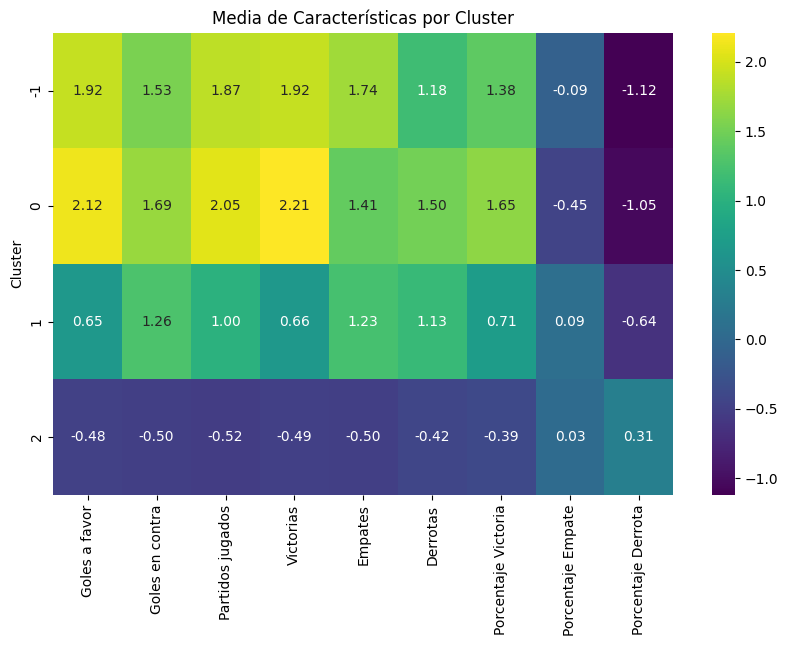

,Goles a favor,Goles en contra,Partidos jugados,Victorias,Empates,Derrotas,Porcentaje Victoria,Porcentaje Empate,Porcentaje Derrota
DBSCAN_Cluster_aj,,,,,,,,,
-1,1.919466,1.534276,1.874534,1.917900,1.737870,1.176688,1.376419,-0.094322,-1.118260
0,2.118764,1.692157,2.054760,2.207948,1.406315,1.502554,1.646676,-0.452190,-1.047684
1,0.650954,1.263624,1.000639,0.655341,1.229873,1.126747,0.708256,0.087153,-0.644597
2,-0.478791,-0.497951,-0.523216,-0.485434,-0.497573,-0.420479,-0.389585,0.029045,0.307240


In [38]:
#Calcular las caractericas promedio por cluster
df_dbscan =df_estadisticas_normalizadas.drop(['HOME_TEAM', 'cluster','DBSCAN_Cluster'], axis=1)

media_cluster = df_dbscan.groupby('DBSCAN_Cluster_aj').mean()

#visualizar
plt.figure(figsize=(10, 6))
sns.heatmap(media_cluster, annot=True, cmap='viridis', fmt='.2f')

plt.title('Media de Características por Cluster')
plt.ylabel('Cluster')
plt.show()

media_cluster
